# Problem Statement

#####
Develop a machine learning model to predict house prices in Mumbai using historical data. 
The goal is to estimate the selling price of a property based on various features, 
such as location, Builtup area, No.of bedrooms. The model will assist customers in 
making informed decisions regarding real estate investments in the Mumbai region.

## Import Important Libraries

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## load the Data

In [3]:
# def get_data():
#     return pd.read_csv('./main.csv')

In [53]:
df=pd.read_csv('./main.csv')

## EDA

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42290 entries, 0 to 42289
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project Name          42290 non-null  object 
 1   Project Price         42290 non-null  object 
 2   Builtup Area          42290 non-null  int64  
 3   Rate per SQft         42290 non-null  object 
 4   BHK                   42290 non-null  float64
 5   Location              42290 non-null  object 
 6   Construction Details  42290 non-null  object 
 7   Builder Name          42290 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.6+ MB


In [64]:
df.nunique()

Project Name             5353
Project Price            4583
Builtup Area             2148
Rate per SQft           12057
BHK                        44
Location                  289
Construction Details        4
Builder Name             1639
dtype: int64

In [56]:
df.describe()

,Builtup Area,BHK
count,42290.000000,42290.000000
mean,1005.439678,2.213793
std,861.358006,1.543696
min,127.000000,1.000000
25%,541.000000,1.000000
50%,753.000000,2.000000
75%,1194.000000,3.000000
max,43560.000000,90.000000


In [65]:
df.isna().sum()

Project Name            0
Project Price           0
Builtup Area            0
Rate per SQft           0
BHK                     0
Location                0
Construction Details    0
Builder Name            0
dtype: int64

## data Preprocessing

#### column adjustment

In [7]:
df['Locality']=df['Location'].str.split(',').apply(lambda x:x[0])

In [8]:
# df['zone']=df['Location'].str.split(',').apply(lambda x:x[-1])

In [9]:
df = df.drop('Location', axis=1)

In [10]:
# Zone Formation

KDB=['Badlapur West','Dombivali','Badlapur East', 'Ambernath East',
       'Ambernath West', 'Kalyan West', 'Khopoli',
      'Karjat','Kalyan East', 'Palava','Khardi', 'Ulhasnagar', 'Shil Phata','Titwala',
       'Kasheli', 'Kalyan', 'Dombivali East', 'Jambrung','Murbad',
       'Shelu', 'Dombivli East','Dombivli (West)', 'Ambarnath','Thakurli','dombivli west','Badlapur',
     'Adharwadi','khadakpada','Gauripada', 'Badlapur Gaon', 'Kalyan Shilphata Road','Desale Pada', 'Pisavli Village']

MiraB=['Mira Road East','Bhayandar East','Bhayandar West','Mira Bhayander Road', 'Mira Bhayandar']

Mumbai=[ 'Andheri West', 'Vikhroli','Bandra East', 'Dahisar','Malad East',
       'Malad West', 'Jogeshwari East','Jogeshwari West','Ville Parle East','Kandivali West', 'Goregaon East', 'Andheri East', 'Mulund West','Ghatkopar East', 'Mahim','Chembur','Govandi','Powai','Kandivali East','Byculla','Mahalaxmi', 'Goregaon West','Parel','Dadar East', 'Kanjurmarg', 'Mulund East', 'Worli', 'Deonar','Prabhadevi', 'Agripada', 'Wadala', 'Kurla', 'Borivali East','Tilak Nagar', 'Bhandup West', 'Nahur East','Lower Parel', 'Napeansea Road','Matunga', 'Borivali West','Bandra West',
       'Santacruz West', 'Juhu', 'Chinchpokli','Pant Nagar', 'Sion', 'Ghatkopar West','Fort', 'Dadar West', 'Tardeo','Girgaon','Santacruz East', 'mumbai','Mumbai Central', 'Marine Lines', 'Bhandup East','Malabar Hill','Mazagaon', 'Bandra Kurla Complex', 'Khar', 'Saki Naka', 'Sewri','Kurla East','Borivali','Byculla East', 'Mazgaon', 'Mulund', 'Dahisar East',
       'Chembur East', 'Ville Parle West','Mahavir Nagar','Yari Road', 'Shivaji Park', 'Dahisar West','Irani Wadi', 'Malad', 'Juhu Scheme', 'Oshiwara', 'Khar West', 'Churchgate',
       'Walkeshwar', 'Peddar Road', 'Altamount Road', 'JB Nagar Tarun Bharat', 'DN Nagar Road', 'Breach Candy', 'Nehru Nagar', 'Eksar Village',
       'Old MHB Colony Mumbai', 'Devidas Cross Lane', 'Eksar',
       'eksar road', 'Jayraj Nagar near Yogi Nagar', 'LIC Colony',
       'gorai', 'Gorai 1', 'Shimpoli', 'yogi nagar','Babhai',
       'Borivali West Old MHB Colony', 'Vikroli East', 'Colaba',
       'Cuffe Parade', 'Nariman Point','Bhuleshwar', 'Chandivali', 'Andheri','Hiranandani Estates', 'Dattapada', 'Natakwala Lane', 'Syndicate','LBS Marg Mulund West','Perry Cross Rd',
       'GTB Nagar', 'Ghatkopar',
       'Veera Desai Road', 'azad nagar','Vallabh Baug Lane', 'lower parel west', 'Ekta Nagar', 'Chedda Nagar', 'Kanjur Marg West', 'matunga east',
       'Nagpada', 'kandivali', 'Charni Road', 'Bandra','Sai Baba Nagar Lane',
       'Oshiwara Police Station Road','Sion Koliwada', 'Maneklal, Estate','Siddhartha Nagar', 'Versova',
       'Lokhandwala complex', 'Kalina', 'ACC Cement Road', 'Poonam Nagar',
       'Vakola Yashwant Nagar']
Palghar = ['Boisar','Kewale','Palghar','Saphale',  'Umroli','Makane Kapase',  
           'Wada', 'Ambivali']
Panvel_NM = ['Panvel','Taloja',
       'Rasayani', 'Ulwe','Kalamboli',
       'Karanjade', 'Kharghar', 'Sector 19 Kharghar',
       'Ghansoli',
       'Vashi', 'Airoli' 'Koper Khairane',
       'Koproli','Kamothe',
       'Seawoods', 'Dronagiri', 'Owale', 'Neral',
       'Sanpada','Navghar', 'Chirle',
       'Belondakhar', 'Taloje',
       'Belapur', 'Dighe',
       'Umroli', 'Sector-50 Seawoods',
      
       'Vangani', 'Sector 21 Ghansoli', 'Vasind',
       'Sector15 Ghansoli', 'Ghansoli Gaon', 'Sector 21 Kamothe',
       'Makane Kapase',
       'Jambrung',
       'Giravale','Sector-15 Ghansoli','Sector-2A Kopar Khairane','Juinagar',
       'Devad', 'Lodhivali',
        'ULWE SECTOR 19','Sector 12 Kharghar', 'Taloja Phase 2', 'Nevali',
      'karanjade panvel',
      'old panvel',
       'Dhamote', 'Khandeshwar', 'CBD Belapur East',
       'new panvel karanjade',
       'Sector 23 Ulwe','Sector 17 Ulwe',
       'Sector35D Kharghar', 'Century Mills',
       'Uran',
       'Sector 21 Kharghar','Sector13 Kharghar',
       'Rabale Station Road',
        'Rabale',
       'JNPT Port Khopate Road', 'Beverly Park']

Thane =['Thane West','Panch Pakhdi', 'Naupada',
       'Manpada', 'Patlipada', 'Kolshet Road Thane West',
       'vasant vihar thane west', 'Brahmand Thane West',
       'Ghodbunder Road', 'Pokhran 2', 'Thane','Kalwa',
       'Kasar vadavali','Diva Gaon']

VasaiVirar = ['Virar', 'Vasai', 'Naigaon East', 'Nala Sopara',
              'Bhayandar East','Virar West','Navghar','Vasai West', 'Vasai east','Naigaon West','nallasopara W',
              'Nalasopara East','Virar East','Nalasopara West','Residential Flat Virar West']

In [11]:
def assign_zone(location):
    if location in KDB:
        return 'KDBK'
    elif location in MiraB:
        return 'MiraB'
    elif location in Mumbai:
        return 'Mumbai'
    elif location in Palghar:
        return 'Palghar'
    elif location in Panvel_NM:
        return 'Panvel_NM'
    elif location in Thane:
        return 'Thane'
    elif location in VasaiVirar:
        return 'VasaiVirar'
    else:
        return None

# Apply the function to create the 'zone' column
df['zone'] = df['Locality'].apply(assign_zone)

In [12]:
df

,Project Name,Project Price,Builtup Area,Rate per SQft,BHK,Construction Details,Builder Name,Locality,zone
0,Soundlines Codename Urban Rainforest,59.98 L,876,"6,848 / sq ft",2.0,Under Construction,Soundlines Realty,Panvel,Panvel_NM
1,Agami Estancia,1.99 Cr,2921,"6,813 / sq ft",5.0,Under Construction,Agami Realty,Boisar,Palghar
2,Peridot Signature By Peridot,1.56 Cr,567,"27,558 / sq ft",2.0,Under Construction,Peridot Builder Developer,Andheri West,Mumbai
3,Aikya Roots,4 Cr,1370,"29,197 / sq ft",3.0,Under Construction,Aikya Realty Pvt Ltd,Vikhroli,Mumbai
4,Lotus Aura,29 L,411,"7,056 / sq ft",1.0,Under Construction,Lotus Homes Mumbai,Badlapur West,KDBK
...,...,...,...,...,...,...,...,...,...
42285,Hiranandani Fortune City,1.25 Cr,750,"16,675 / sq ft",2.0,Ready to move,UTTAM PAWAR,Panvel,Panvel_NM
42286,Indiabulls Daffodils,1.9 Cr,2048,"9,277 / sq ft",4.0,Ready to move,UTTAM PAWAR,Panvel,Panvel_NM
42287,Omkar Alta Monte,2.3 Cr,718,"32,078 / sq ft",2.0,Ready to move,RUDRA REALTY,Malad East,Mumbai
42288,Sumit Gurukrishna,3.69 Cr,774,"47,803 / sq ft",3.0,Under Construction,RUDRA REALTY,Ville Parle East,Mumbai


#### Converting Partial Qualitative data to Quantitative

In [14]:
#Converting Partial Qualitative data to numeric

def convert_price(price):
    if 'L' in price:
        return float(price.replace(' L', '')) * 1e5
    elif 'Cr' in price:
        return float(price.replace(' Cr', '')) * 1e7
    return float(price)

In [15]:
df['Project Price'] = df['Project Price'].apply(convert_price)

In [16]:
df['Rate per SQft'] = df['Rate per SQft'].str.replace(',', '').str.extract('(\d+)').astype(float)

In [18]:
# df = pd.get_dummies(df, columns=['Location', 'Construction Details', 'Builder Name'], drop_first=True)

#### removing Outliers

In [21]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns to check for outliers
columns = ['Project Price', 'Builtup Area']

# Remove outliers
df_cleaned = remove_outliers(df, columns)

# Display statistics after removing outliers
print(df_cleaned.describe())

       Project Price  Builtup Area  Rate per SQft           BHK
count   3.731100e+04  37311.000000   37311.000000  37311.000000
mean    1.400264e+07    806.480261   17464.785291      1.972869
std     9.339021e+06    387.355816    9030.973101      0.885225
min     1.500000e+05    127.000000     229.000000      1.000000
25%     6.499500e+06    512.000000   10667.000000      1.000000
50%     1.190000e+07    695.000000   16000.000000      2.000000
75%     1.900000e+07   1028.000000   22944.000000      3.000000
max     4.710000e+07   1931.000000   80689.000000     48.000000


In [22]:
# label_encoders = {}
# categorical_columns = ['zone', 'Construction Details', 'Builder Name','Locality']

In [23]:
# from sklearn.preprocessing import LabelEncoder
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

#### label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder

# Example of encoding the 'zone' column
encoder = LabelEncoder()
df_cleaned['Locality'] = encoder.fit_transform(df_cleaned['Locality'])
df_cleaned['Builder Name'] = encoder.fit_transform(df_cleaned['Builder Name'])
# df_cleaned['Construction Details'] = encoder.fit_transform(df_cleaned['Construction Details	'])
df_cleaned['zone'] = encoder.fit_transform(df_cleaned['zone'])

# Retrieve the mapping of cities (or zones) to encoded values
zone_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print(zone_mapping)


{'KDBK': 0, 'MiraB': 1, 'Mumbai': 2, 'Palghar': 3, 'Panvel_NM': 4, 'Thane': 5, 'VasaiVirar': 6, None: 7}


In [25]:
df_cleaned = df_cleaned[df_cleaned['Rate per SQft'] > 2500]

In [26]:
df_cleaned.describe()

,Project Price,Builtup Area,Rate per SQft,BHK,Builder Name,Locality,zone
count,3.722700e+04,37227.000000,37227.000000,37227.000000,37227.000000,37227.000000,37227.000000
mean,1.403180e+07,805.650711,17502.151476,1.969146,851.913262,143.942971,3.090955
std,9.329259e+06,386.971893,9006.749473,0.878884,443.960173,72.104527,1.938506
min,7.000000e+05,127.000000,2629.000000,1.000000,0.000000,0.000000,0.000000
25%,6.500000e+06,512.000000,10701.500000,1.000000,470.000000,93.000000,2.000000
50%,1.200000e+07,695.000000,16037.000000,2.000000,937.000000,143.000000,2.000000
75%,1.900000e+07,1026.000000,22950.000000,3.000000,1268.000000,221.000000,5.000000
max,4.710000e+07,1931.000000,80689.000000,48.000000,1597.000000,265.000000,7.000000


## Split the data into X and Y

In [27]:
X = df_cleaned.drop(columns=['Project Name', 'Project Price','Project Name','Construction Details','Builder Name','Rate per SQft','Locality'],axis=1)
y = df_cleaned['Project Price']

In [28]:
X

,Builtup Area,BHK,zone
0,876,2.0,4
2,567,2.0,2
3,1370,3.0,2
4,411,1.0,0
6,1629,4.0,4
...,...,...,...
42284,1653,3.0,4
42285,750,2.0,4
42287,718,2.0,2
42288,774,3.0,2


## Split the data into train and test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12345)

## Scale the data 

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# Save the scaler for later use in the Flask app
# with open('./scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

## Model Building

In [32]:
# from sklearn.linear_model import LinearRegression

# # Initialize and train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=20)

In [34]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror', n_estimators=200, seed=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
# from catboost import CatBoostRegressor
# model = CatBoostRegressor(iterations=100,learning_rate=0.05,depth=5)
# model.fit(X_train, y_train)

In [36]:
# from sklearn.ensemble import AdaBoostRegressor
# model = AdaBoostRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

In [37]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=50, max_depth=3)
# model.fit(X_train, y_train)

## Model Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)
y_true = y_test

# Evaluate the model
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 19674576469996.73
Mean Absolute Error: 2835113.1455255616
R^2 Score: 0.7758248334805957


## prediction

In [39]:
new_data = {
    "Builtup Area": [555],
    "BHK": [1],
    "zone":[0]
}

new_df = pd.DataFrame(new_data)

# Scale the new data
new_df = scaler.transform(new_df)

# Predict the price
predicted_price = model.predict(new_df)
print(f"Predicted Price for New Data: {predicted_price[0]:.1f}")

Predicted Price for New Data: 3592190.0


## Visualize the data

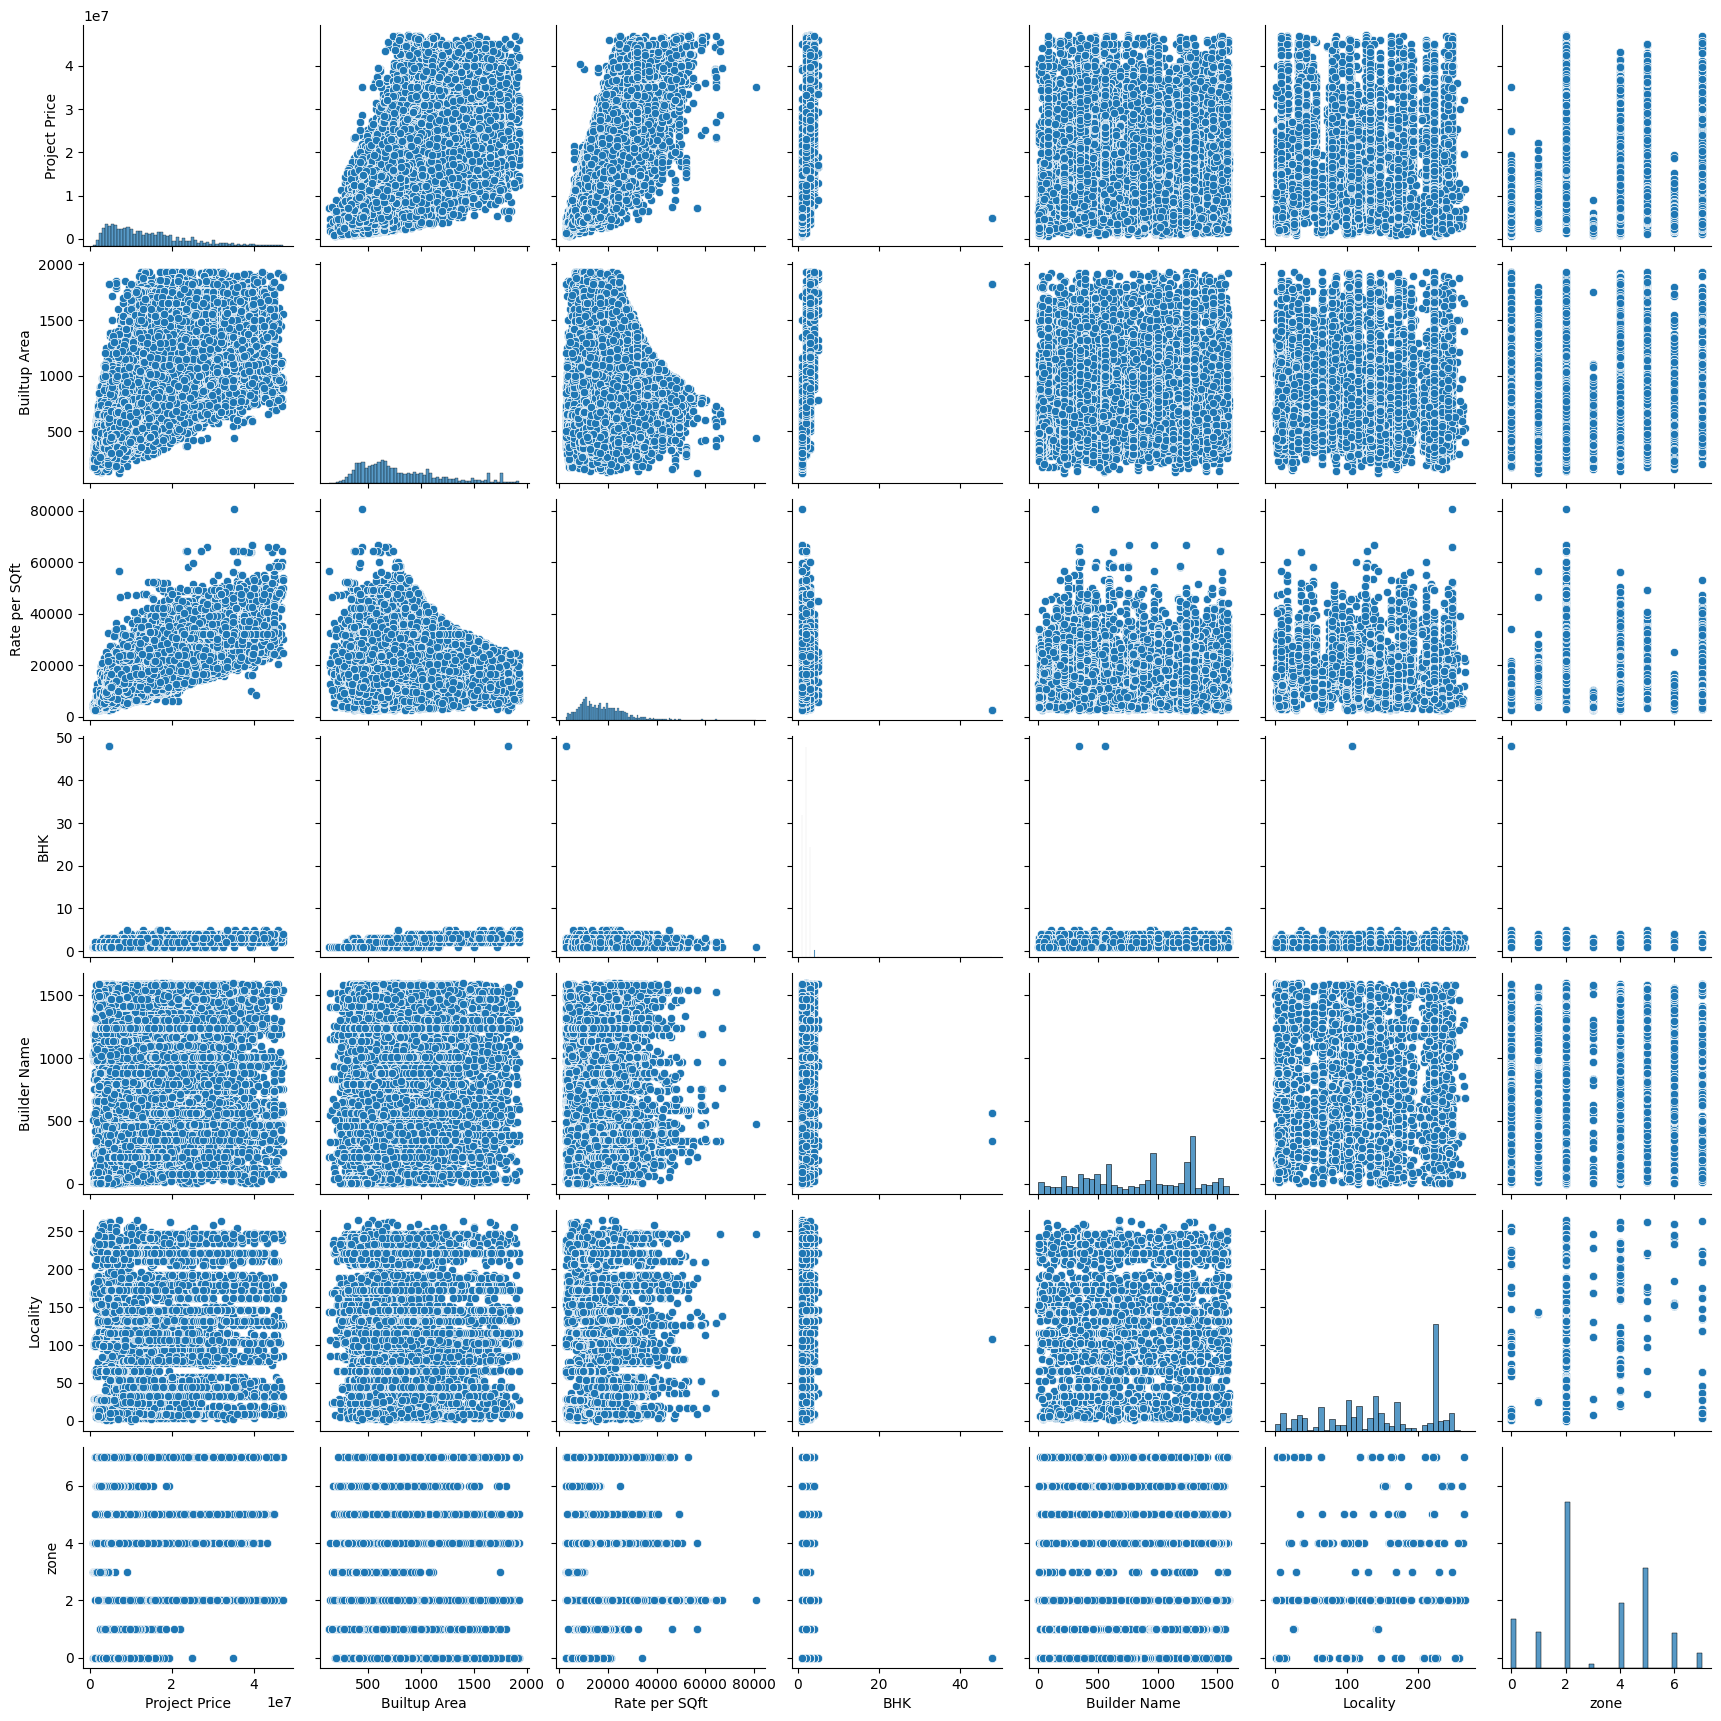

In [60]:
sns.pairplot(df_cleaned)


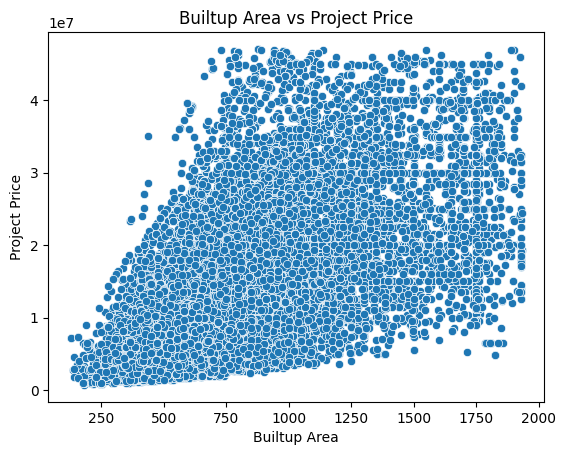

In [41]:

# plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cleaned['Builtup Area'], y=df_cleaned['Project Price'])
plt.title('Builtup Area vs Project Price')
plt.xlabel('Builtup Area')
plt.ylabel('Project Price')
plt.show()

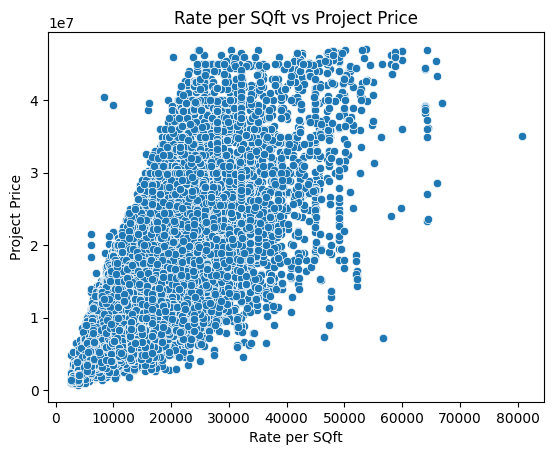

In [42]:
sns.scatterplot(x=df_cleaned['Rate per SQft'], y=df_cleaned['Project Price'])
plt.title('Rate per SQft vs Project Price')
plt.xlabel('Rate per SQft')
plt.ylabel('Project Price')
plt.show()

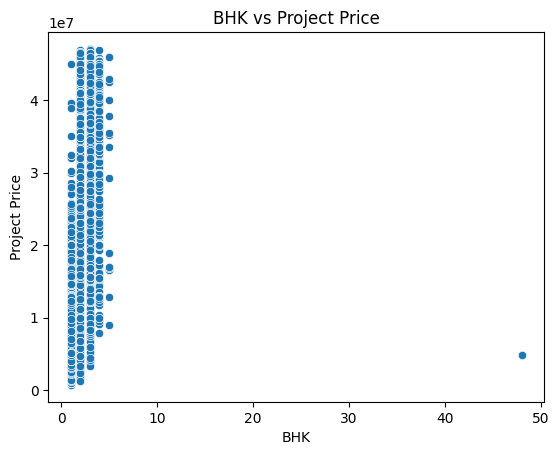

In [43]:
sns.scatterplot(x=df_cleaned['BHK'], y=df_cleaned['Project Price'])
plt.title('BHK vs Project Price')
plt.xlabel('BHK')
plt.ylabel('Project Price')
plt.show()

## create pickle file to dump the model

In [44]:
# with open('./model.pkl', 'wb') as file:
#     pickle.dump(model, file)